# pyaudio
**A library for working with audio input/output, including audio recording and playback using the PortAudio library.**

In [1]:
!pip install pyaudio

     ------------------------------------ 164.1/164.1 kB 578.3 kB/s eta 0:00:00


In [23]:
import pyaudio
import wave

def record_voice(output_filename, duration=5, sample_rate=44100, channels=2, chunk_size=1024):
    audio_format = pyaudio.paInt16
    p = pyaudio.PyAudio()

    stream = p.open(format=audio_format,
                    channels=channels,
                    rate=sample_rate,
                    input=True,
                    frames_per_buffer=chunk_size)

    print("Recording...")
    frames = []
    for i in range(0, int(sample_rate / chunk_size * duration)):
        data = stream.read(chunk_size)
        frames.append(data)

    print("Recording finished!")

    stream.stop_stream()
    stream.close()
    p.terminate()

    with wave.open(output_filename, 'wb') as wf:
        wf.setnchannels(channels)
        wf.setsampwidth(p.get_sample_size(audio_format))
        wf.setframerate(sample_rate)
        wf.writeframes(b''.join(frames))

if __name__ == "__main__":
    output_file = "recorded_voice_pyaudio.wav"
    recording_duration = 5  # Adjust the duration (in seconds) for your desired recording time.
    record_voice(output_file, duration=recording_duration)

Recording...
Recording finished!


# sounddevice
**A library for real-time audio input/output, similar to PyAudio but with a different API.**

In [12]:
!pip install sounddevice

     -------------------------------------- 199.7/199.7 kB 1.2 MB/s eta 0:00:00


In [21]:
import sounddevice as sd
from scipy.io import wavfile

def record_voice(output_filename, duration=5, sample_rate=44100):
    print("Recording...")
    recorded_audio = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2, dtype='int16')
    sd.wait()
    print("Recording finished!")

    wavfile.write(output_filename, sample_rate, recorded_audio)

if __name__ == "__main__":
    output_file = "recorded_voice_sounddevice.wav"
    recording_duration = 5  # Adjust the duration (in seconds) for your desired recording time.
    record_voice(output_file, duration=recording_duration)

Recording...
Recording finished!


# SoundFile
**A library for reading and writing audio files in various formats (e.g., WAV, FLAC, Ogg Vorbis, etc.).**

In [4]:
import soundfile as sf

def read_audio(file_path):
    audio_data, sample_rate = sf.read(file_path)
    return audio_data, sample_rate

def write_audio(output_file, audio_data, sample_rate):
    sf.write(output_file, audio_data, sample_rate)

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    audio_data, sample_rate = read_audio(input_file)

    # Print some information about the audio file
    print(f"Audio data shape: {audio_data.shape}")
    print(f"Sample rate: {sample_rate} Hz")

    # Change the audio data (e.g., apply some processing)
    # For demonstration, we'll just increase the volume by 2x
    modified_audio_data = audio_data * 2.0
    
    output_file = "Modified_voiceSoundFile.wav"
    write_audio(output_file, modified_audio_data, sample_rate)
    print(f"Modified audio written to: {output_file}")

Audio data shape: (220500, 2)
Sample rate: 44100 Hz
Modified audio written to: Modified_voiceSoundFile.wav


# LibROSA
**A library for audio and music analysis, providing tools for feature extraction, spectral analysis, and more.**

In [1]:
!pip install librosa
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Audio data shape: (110250,)
Sample rate: 22050 Hz


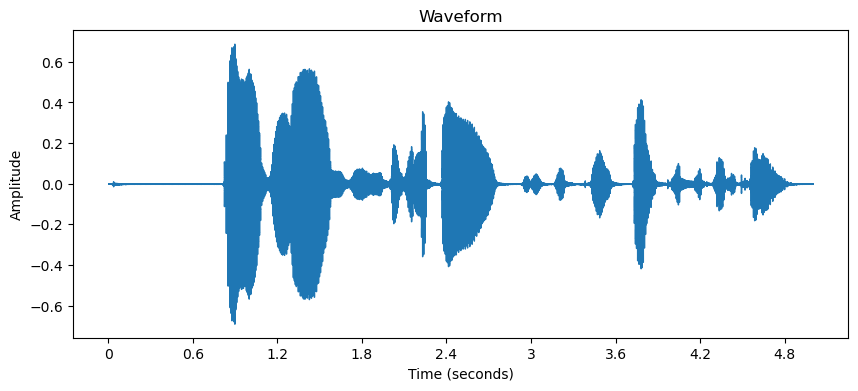

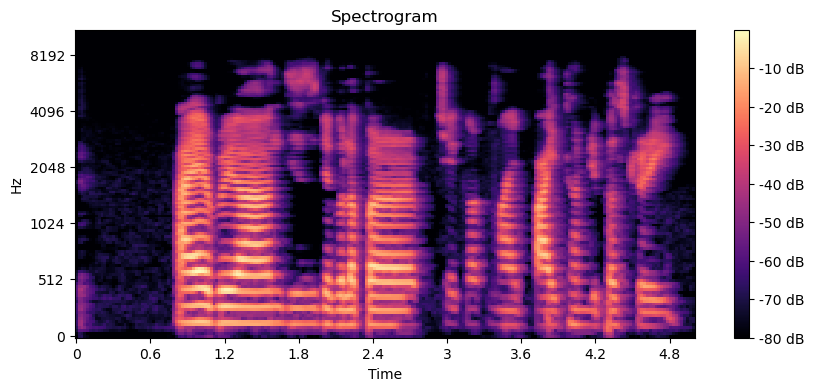

Plots saved as 'waveform.png' and 'spectrogram.png' in the current directory.


In [34]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=RuntimeWarning)

def load_audio(file_path, duration=None, offset=0):
    audio_data, sample_rate = librosa.load(file_path, duration=duration, offset=offset)
    return audio_data, sample_rate

def plot_waveform(audio_data, sample_rate, output_path):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title("Waveform")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.savefig(os.path.join(output_path, "waveform.png"))
    plt.show()
    plt.close()

def plot_spectrogram(audio_data, sample_rate, output_path):
    plt.figure(figsize=(10, 4))
    spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title("Spectrogram")
    plt.savefig(os.path.join(output_path, "spectrogram.png"))
    plt.show()
    plt.close()

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    output_path = "."  # You can change this to the desired output directory

    audio_data, sample_rate = load_audio(input_file)

    # Print some information about the audio file
    print(f"Audio data shape: {audio_data.shape}")
    print(f"Sample rate: {sample_rate} Hz")

    # Plot the audio waveform and spectrogram
    plot_waveform(audio_data, sample_rate, output_path)
    plot_spectrogram(audio_data, sample_rate, output_path)

    print("Plots saved as 'waveform.png' and 'spectrogram.png' in the current directory.")


# pydub
**A library for audio processing that provides simple audio file manipulation, such as concatenation, conversion, and filtering.**

In [16]:
!pip install pydub

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from pydub import AudioSegment

def manipulate_audio(input_file, output_file):
    audio = AudioSegment.from_file(input_file)

    print("Channels:", audio.channels)
    print("Sample width:", audio.sample_width)
    print("Frame rate:", audio.frame_rate)
    print("Frame width:", audio.frame_width)
    print("Length (ms):", len(audio))

    # Extract a segment of the audio (e.g., from 10 seconds to 20 seconds)
    start_time = 10000  # 10 seconds
    end_time = 20000    # 20 seconds
    segment = audio[start_time:end_time]

    # Adjust the volume of the segment
    segment = segment - 10  # Reduce the volume by 10 dB

    # Fade in and out the segment
    segment = segment.fade_in(1000)   # Fade in the first 1 second
    segment = segment.fade_out(1000)  # Fade out the last 1 second
    segment.export(output_file, format="wav")

if __name__ == "__main__":
    # Set the file paths for the input and output audio files
    input_file = "recorded_voice_pydub.wav"
    output_file = "Modified_voice_pydub.wav"
    manipulate_audio(input_file, output_file)

Channels: 2
Sample width: 4
Frame rate: 44100
Frame width: 8
Length (ms): 31530


# audioread
**A library for decoding audio files, which can be used to read audio data from various formats without worrying about the specific format details.**

In [22]:
import audioread

def read_audio(file_path):
    with audioread.audio_open(file_path) as audio_file:
        # Get basic information about the audio file
        print("Channels:", audio_file.channels)
        print("Sample rate:", audio_file.samplerate)
        print("Duration (seconds):", audio_file.duration)
        for buf in audio_file:
            pass

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    read_audio(input_file)

Channels: 2
Sample rate: 44100
Duration (seconds): 5.0


**___________________________________**
# | Not Workng Libaries |
**___________________________________**

# pyAudioAnalysis
**A library for audio feature extraction, classification, and segmentation.**

In [ ]:
!pip install pyAudioAnalysis
!pip install eyed3

In [ ]:
from pyAudioAnalysis import audioBasicIO, ShortTermFeatureExtractor

def extract_audio_features(file_path):
    audio, sample_rate = audioBasicIO.read_audio_file(file_path)
    feature_extractor = ShortTermFeatureExtractor()
    features, feature_names = feature_extractor.feature_extraction(
        audio, sample_rate, 0.050 * sample_rate, 0.025 * sample_rate)

    return features, feature_names

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    audio_features, feature_names = extract_audio_features(input_file)

    for i, feature_vector in enumerate(audio_features.T):
        print(f"Frame {i+1}:")
        for feature_name, feature_value in zip(feature_names, feature_vector):
            print(f"{feature_name}: {feature_value}")
        print()

# Essentia
**An open-source library for audio analysis and audio-based music information retrieval tasks.**

In [ ]:
!pip install essentia

In [ ]:
import essentia.standard as es

def compute_mfccs(file_path):
    loader = es.MonoLoader(filename=file_path)
    audio = loader()
    mfcc_extractor = es.MFCC()
    mfccs = mfcc_extractor(audio)
    return mfccs

if __name__ == "__main__":
    input_file = "input_audio.wav"
    mfccs = compute_mfccs(input_file)
    # Print the first frame of MFCCs
    print("MFCCs of the first frame:")
    print(mfccs[0])

# Madmom
**A library for music information retrieval tasks, including beat and onset detection, chord recognition, and more.**

In [ ]:
!pip install madmom

In [ ]:
import madmom
import librosa.display
import matplotlib.pyplot as plt

def beat_tracking(file_path):
    audio_data, sample_rate = madmom.audio.signal.load_wave_file(file_path)

    # Perform beat tracking using Madmom
    proc = madmom.features.beats.DBNBeatTrackingProcessor(fps=100)
    act = madmom.features.beats.RNNBeatProcessor()(file_path)
    beats = madmom.features.beats.PostProcessor()(act)

    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.vlines(beats, -1, 1, color='r', linestyle='--', alpha=0.7, label='Detected Beats')
    plt.title("Waveform with Detected Beats")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    beat_tracking(input_file)

# Aubio
**A library specifically designed for audio and music analysis, including pitch detection, onset detection, and tempo estimation.**

In [ ]:
!pip install aubio

In [ ]:
import aubio

def pitch_tracking(file_path):
    # Create an instance of the pitch tracker
    pitch_tracker = aubio.pitch("yin", hop_size=256, sample_rate=44100)
    audio_file = aubio.source(file_path, 44100, 256)

    print("Sample rate:", audio_file.samplerate)
    print("Channels:", audio_file.channels)

    while True:
        samples, read = audio_file()
        pitch = pitch_tracker(samples)[0]
        confidence = pitch_tracker.get_confidence()

        # Check if the pitch is valid
        if confidence > 0.9:  # Adjust the threshold as needed
            print(f"Pitch: {pitch:.2f} Hz")
        if read < 256:
            break

def onset_detection(file_path):
    # Create an instance of the onset detector
    onset_detector = aubio.onset("default", 256, 128, 44100)
    audio_file = aubio.source(file_path, 44100, 256)
    while True:
        samples, read = audio_file()
        is_onset = onset_detector(samples)

        # Check if an onset is detected
        if is_onset:
            print("Onset detected")

        if read < 256:
            break

if __name__ == "__main__":
    input_file = "recorded_voice_sounddevice.wav"
    pitch_tracking(input_file)
    onset_detection(input_file)